In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import os
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
def load_images(folder_path, categories):
  images = []
  image_labels = []
  for category in categories:
    path = os.path.join(folder_path,category)
    label = categories.index(category)
    for image in os.listdir(path):
      if image is not None:
        img = cv2.imread(os.path.join(path,image),0) 
        img = cv2.resize(img, (128,128)) # resizing to (128,128)
        images.append(img)
        image_labels.append(label)
      else:
        pass
  images = (np.array(images))/255 #converting to array and normalizing images
  image_labels = np.array(image_labels)
  return images,image_labels


In [ ]:
folder_path = "/content/drive/MyDrive/Potato"
categories = os.listdir(folder_path) 

In [ ]:
images, image_labels = load_images(folder_path, categories)
images = np.expand_dims(images, axis = -1) #images are gray scale add an extra dimension for shape of (batch,128,128,1)

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(images,image_labels,test_size = 0.2,random_state = 10) # 20% for validation
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train, test_size = 0.1, random_state  =10) # 10% for test, 70% for train

In [ ]:
print("Training Shape",X_train.shape)
print("Validation Shape",X_val.shape)
print("Test Shape",X_test.shape)

Training Shape (1548, 128, 128, 1)
Validation Shape (431, 128, 128, 1)
Test Shape (173, 128, 128, 1)


In [ ]:
print("Training Shape",Y_train.shape)
print("Validation Shape",Y_val.shape)
print("Test Shape",Y_test.shape)

Training Shape (1548,)
Validation Shape (431,)
Test Shape (173,)


In [ ]:
input = Input(shape = (128,128,1))
x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(input)
x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = "valid")(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(filters = 128, kernel_size = 3, strides = 1, padding = "valid")(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(128, activation = "relu")(x)
output = Dense(3, activation = "softmax")(x)


model = Model(inputs = input, outputs = output)

In [ ]:
model.compile(optimizer = "rmsprop",loss ="sparse_categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train,Y_train,validation_data = (X_val,Y_val),epochs = 30, batch_size = 64)

Epoch 1/30
25/25 [==============================] - 3s 103ms/step - loss: 28.1271 - accuracy: 0.4483 - val_loss: 0.9303 - val_accuracy: 0.5360
Epoch 2/30
25/25 [==============================] - 2s 93ms/step - loss: 4.5332 - accuracy: 0.5924 - val_loss: 0.7924 - val_accuracy: 0.5940
Epoch 3/30
25/25 [==============================] - 2s 93ms/step - loss: 0.6416 - accuracy: 0.7519 - val_loss: 0.9065 - val_accuracy: 0.4942
Epoch 4/30
25/25 [==============================] - 2s 93ms/step - loss: 4.6935 - accuracy: 0.6880 - val_loss: 0.5595 - val_accuracy: 0.8051
Epoch 5/30
25/25 [==============================] - 2s 93ms/step - loss: 0.5312 - accuracy: 0.8127 - val_loss: 1.2794 - val_accuracy: 0.5220
Epoch 6/30
25/25 [==============================] - 2s 94ms/step - loss: 1.0285 - accuracy: 0.7965 - val_loss: 3.0374 - val_accuracy: 0.4478
Epoch 7/30
25/25 [==============================] - 2s 94ms/step - loss: 0.5040 - accuracy: 0.8482 - val_loss: 0.9289 - val_accuracy: 0.6682
Epoch 8/30


#Training and Validation Loss

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Training and Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"], loc='upper right')
plt.show()
     

#Training and Validation Accuracy

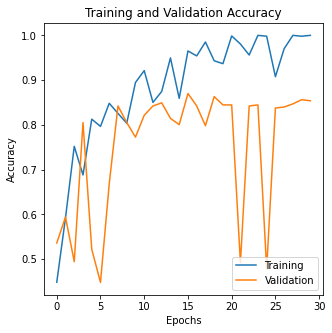

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Training","Validation"], loc='lower right')
plt.show()

#Confusion Matrix

6/6 [==============================] - 0s 17ms/step


[]

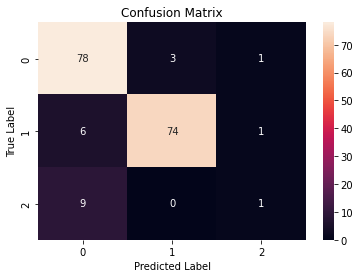

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis = 1)


cm = confusion_matrix(Y_test,y_pred)

sns.heatmap(cm,annot = True,fmt = ".3g")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.plot()